In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from PIL import Image

First, we generate random scenes with multiple objects in them, which serve as “before” images.

For each “before” image we create two “after” images. In the first one, 
we change the camera posi- tion leading to a different angle, zoom, and/or illumination. (no sem. change)

In the second “after” image, we additionally introduce a scene change. (sem. change)

In total, we generate 39, 803 “before” images with respec- tively 79, 606 “after” images. 
We make sure that the num- ber of data points for each scene change type is balanced. 
The dataset is split into 67,660, 3,976, and 7,970 train- ing/validation/test image pairs, respectively.


In [3]:
import os
datadir_pre = "/data/clevr_change_pre_sc"
os.listdir(datadir_pre)

['VAL_CAPLENS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 'VAL_IMAGES_AFTER_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.hdf5',
 'results',
 'WORDMAP_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 'results_5cap',
 'TRAIN_IMAGES_BEFORE_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.hdf5',
 'TRAIN_IMAGES_AFTER_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.hdf5',
 'TEST_NSC_STORE_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 '.ipynb_checkpoints',
 'TEST_NSC_STORE_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.hdf5',
 'TRAIN_CAPTIONS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 'TEST_SC_STORE_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.hdf5',
 'VAL_CAPTIONS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 'TEST_SC_STORE_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 'TRAIN_CAPLENS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json',
 'VAL_IMAGES_BEFORE_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.hdf5']

In [4]:
datadir = "/data/ImageCorpora/CLEVR_Change"
[print(d) for d in os.listdir(datadir)]
print("Images: ", str(len(os.listdir(datadir + "/images"))))
print("NSC Im: ", str(len(os.listdir(datadir + "/nsc_images"))))
print(" SC Im: ", str(len(os.listdir(datadir + "/sc_images"))))

no_change_captions_reformat.json
change_captions_reformat.json
splits.json
iou_sorted.txt
no_change_captions.json
change_captions.json
change_captions_by_IOU.json
sc_images
change_captions_with_bbox.json
nsc_images
type_mapping.json
total_change_captions_reformat.json
images
Images:  40000
NSC Im:  40000
 SC Im:  40000


In [5]:
os.listdir(datadir + "/images")[:5]

['CLEVR_default_027144.png',
 'CLEVR_default_007333.png',
 'CLEVR_default_005424.png',
 'CLEVR_default_027181.png',
 'CLEVR_default_039976.png']

In [6]:
os.listdir(datadir + "/nsc_images")[:5]

['CLEVR_nonsemantic_011372.png',
 'CLEVR_nonsemantic_038812.png',
 'CLEVR_nonsemantic_015533.png',
 'CLEVR_nonsemantic_025575.png',
 'CLEVR_nonsemantic_009876.png']

In [7]:
os.listdir(datadir + "/sc_images")[:5]

['CLEVR_semantic_018524.png',
 'CLEVR_semantic_021927.png',
 'CLEVR_semantic_016458.png',
 'CLEVR_semantic_012441.png',
 'CLEVR_semantic_028261.png']

In [8]:
import json
def loadf(path):
    with open(path) as f:
        return json.load(f)
def printl(j, pkeys=True, pmax=10):
    if pkeys:
        print(j.keys())
    print("Keys: ", len(j.keys()))
    sl = 0
    for i, k in enumerate(j):
        l = len(j[k])
        if i < pmax:
            print(k, l)
        sl = sl + l
    print("Total values: " + str(sl))

In [9]:
import numpy as np
nsc = loadf(datadir + "/no_change_captions.json")
printl(nsc, pkeys=False)
print("Min:",np.min([len(v) for v in nsc.values()]), "Max:", np.max([len(v) for v in nsc.values()]))

Keys:  39803
CLEVR_default_026307.png 5
CLEVR_default_018848.png 5
CLEVR_default_003280.png 5
CLEVR_default_001879.png 5
CLEVR_default_021778.png 5
CLEVR_default_022257.png 5
CLEVR_default_021304.png 5
CLEVR_default_013367.png 5
CLEVR_default_016290.png 5
CLEVR_default_029384.png 5
Total values: 199015
Min: 5 Max: 5


In [10]:
nsc["CLEVR_default_005422.png"]

['the scene remains the same',
 'no change has occurred',
 'nothing was modified',
 'nothing has changed',
 'the two scenes seem identical']

In [11]:
sc = loadf(datadir + "/change_captions.json")
printl(sc, pkeys=False)
print("Min:",np.min([len(v) for v in sc.values()]), "Max:", np.max([len(v) for v in sc.values()]))

Keys:  39803
CLEVR_default_005422.png 9
CLEVR_default_000031.png 6
CLEVR_default_033588.png 9
CLEVR_default_035238.png 9
CLEVR_default_003468.png 4
CLEVR_default_000831.png 9
CLEVR_default_007896.png 9
CLEVR_default_027232.png 8
CLEVR_default_001220.png 7
CLEVR_default_004473.png 9
Total values: 294720
Min: 1 Max: 9


In [12]:
sc["CLEVR_default_005422.png"]

['the tiny rubber cylinder became brown',
 'the tiny yellow cylinder turned brown',
 'the small matte object became brown',
 'the tiny yellow rubber cylinder that is behind the rubber block became brown',
 'the matte cylinder became brown',
 'the small yellow matte cylinder on the left side of the brown cube changed to brown',
 'the small yellow cylinder changed to brown',
 'the small yellow rubber cylinder left of the brown cube turned brown',
 'the tiny yellow rubber cylinder behind the small metallic sphere turned brown']

In [13]:
from random import choice, sample
def samplecaps(imcaps, captions_per_image_pair=9):
    # Sample captions
    if len(imcaps) < captions_per_image_pair:
        captions = imcaps + [choice(imcaps) for _ in range(captions_per_image_pair - len(imcaps))]
    else:
        captions = sample(imcaps, k=captions_per_image_pair)
    return captions
        
samplecaps(sc["CLEVR_default_005422.png"][:1])

['the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown',
 'the tiny rubber cylinder became brown']

In [14]:
import numpy as np
def showim(base_dir, split_dir, file_name):
    path = os.path.join(base_dir, split_dir, file_name)
    im = Image.open(path)
    im = np.array(im).astype("uint8")
    plt.imshow(im)

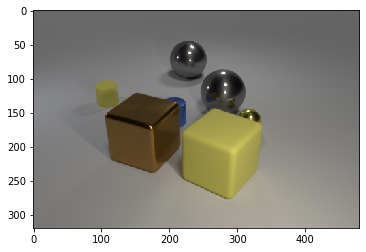

In [15]:
showim(datadir, "images", "CLEVR_default_005422.png")

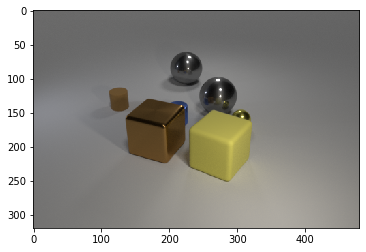

In [16]:
showim(datadir, "sc_images", "CLEVR_semantic_005422.png")

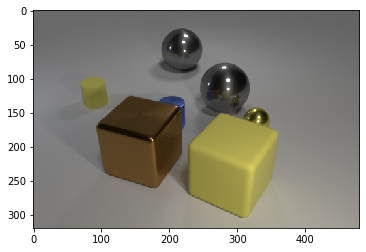

In [17]:
showim(datadir, "nsc_images", "CLEVR_nonsemantic_005422.png")

In [18]:
tm = loadf(datadir + "/type_mapping.json")
printl(tm)

dict_keys(['color', 'material', 'move', 'drop', 'add'])
Keys:  5
color 7958
material 7963
move 7955
drop 7961
add 7966
Total values: 39803


In [19]:
s = loadf(datadir + "/splits.json")
printl(s)

dict_keys(['train', 'val', 'test'])
Keys:  3
train 33830
val 1988
test 3985
Total values: 39803


The test split is just a list of numbers.
The numbers refer to the before" images named "default"

The default images are located in "images" and named like "CLEVR_default_005422.png",
then for each of these there is one semantic change image and one non-semantic change image.

The images are in the respective directories nsc_images and sc_images having the same id
as the default image, but the infix is "nonsemantic" or "semantic" like 
- "CLEVR_semantic_005422.png"
- "CLEVR_nonsemantic_005422.png"

The according captions are in "change_captions.json" or "no_change_captions.json"
where the key is the default image name e.g. "CLEVR_default_005422.png"

Thus we want to create 3 test-sets:
- one having 3985 * 2 image pairs: (before, after nsc, captions) and (before, after sc, captions)
- one having 3985 nsc  image pairs: (before, after nsc, captions)
- one having 3985 sc   image pairs: (before, after  sc, captions)

In [20]:
s["train"][:5]

[1956, 351, 7388, 7440, 6723]

In [21]:
s["test"][:5]

[6594, 6580, 2360, 2714, 992]

In [22]:
list(set(s["test"]) & set(s["train"]))

[]

In [23]:
# How many captions per split?
import numpy as np
def count_caps(splits, split_name):
    lengths = []
    for image_number in splits[split_name]:
        ref = "CLEVR_default_{:>06}.png".format(image_number)
        #print(ref, sc[ref]) 
        lengths.append(len(sc[ref]))
    print("Min:",np.min(lengths), "Max:", np.max(lengths), "Avg:", np.mean(lengths), split_name, len(lengths), np.sum(lengths))
count_caps(s, "train")
count_caps(s, "val")
count_caps(s, "test")

Min: 1 Max: 9 Avg: 7.402157848063848 train 33830 250415
Min: 1 Max: 9 Avg: 7.369718309859155 val 1988 14651
Min: 1 Max: 9 Avg: 7.441405269761606 test 3985 29654


In [24]:
tpre = loadf(datadir_pre + "/TEST_SC_CAPTIONS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json")
print(tpre[0])
len(tpre)

FileNotFoundError: [Errno 2] No such file or directory: '/data/clevr_change_pre_sc/TEST_SC_CAPTIONS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json'

In [ ]:
tpre = loadf(datadir_pre + "/TEST_SC_CAPLENS_CLEVR_CHANGE_9_cap_per_img_pair_1_min_word_freq.json")
print(tpre[:10])
len(tpre)

In [ ]:
3985 * 9